---
<center>
<h3 style="font-size: 50px; font-family: serif;"><b>Traffic Accident Impact</b></h3>
Achille NGUESSIE
</center>

---

### *About the Dataset*
<h4>This dataset is a compilation of car accidents across 49 states in the USA, spanning from February 2016 to March 2023. It's sourced from diverse APIs capturing real-time traffic incident data. These APIs gather information from entities such as transportation departments, law enforcement, traffic cameras, and road sensors. The dataset holds around 7.7 million accident records. For further details on this dataset, additional information can be found <a href="https://smoosavi.org/datasets/us_accidents">here</a>.</h4>

---

In [16]:
from traffic_accident_impact.utils import *
from traffic_accident_impact.config import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<i>This work embarks on an exploration of US accidents. The goal is to predict the impact of traffic accidents on traffic flow by forecasting their duration. By providing accurate predictions, the project aims to enable quicker and more effective decision-making, thereby enhancing road safety and streamline traffic regulation during accident scenarios
</i>

## 1. Features Description
<span id="inf1"></span>
This dataset comprises of 46 columns and 7,728,394 rows

| Features                | Meaning                                                                                      |
|-------------------------|----------------------------------------------------------------------------------------------|
| **ID**                  | This is a unique identifier of the accident record.                                          |
| **Source**              | Source of raw accident data.                                                                |
| **Severity**            | Severity of the accident, from 1 (least impact) to 4 (significant impact on traffic).        |
| **Start_Time**          | Start time of the accident in local time zone.                                               |
| **End_Time**            | End time when the impact of the accident on traffic flow was dismissed.                      |
| **Start_Lat**           | Latitude in GPS coordinate of the start point.                                               |
| **Start_Lng**           | Longitude in GPS coordinate of the start point.                                              |
| **End_Lat**             | Latitude in GPS coordinate of the end point.                                                 |
| **End_Lng**             | Longitude in GPS coordinate of the end point.                                                |
| **Distance(mi)**        | Length of the road extent affected by the accident in miles.                                 |
| **Description**         | Human-provided description of the accident.                                                  |
| **Street**              | Street name in the address field.                                                            |
| **City**                | City in the address field.                                                                  |
| **County**              | County in the address field.                                                                |
| **State**               | State in the address field.                                                                 |
| **Zipcode**             | Zipcode in the address field.                                                              |
| **Country**             | Country in the address field.                                                              |
| **Timezone**            | Timezone based on the location of the accident.                                              |
| **Airport_Code**        | Closest airport-based weather station to the accident location.                              |
| **Weather_Timestamp**   | Timestamp of weather observation record (in local time).                                     |
| **Temperature(F)**      | Temperature in Fahrenheit.                                                                  |
| **Wind_Chill(F)**       | Wind chill in Fahrenheit.                                                                  |
| **Humidity(%)**         | Humidity in percentage.                                                                    |
| **Pressure(in)**        | Air pressure in inches.                                                                    |
| **Visibility(mi)**      | Visibility in miles.                                                                       |
| **Wind_Direction**      | Wind direction.                                                                             |
| **Wind_Speed(mph)**     | Wind speed in miles per hour.                                                               |
| **Precipitation(in)**   | Precipitation amount in inches, if any.                                                    |
| **Weather_Condition**   | Weather condition (e.g., rain, snow, thunderstorm, fog).                                    |
| **Amenity**             | POI annotation indicating the presence of an amenity nearby.                                |
| **Bump**                | POI annotation indicating the presence of a speed bump or hump nearby.                      |
| **Crossing**            | POI annotation indicating the presence of a crossing nearby.                                |
| **Give_Way**            | POI annotation indicating the presence of a give way nearby.                                |
| **Junction**            | POI annotation indicating the presence of a junction nearby.                                |
| **No_Exit**             | POI annotation indicating the presence of no exit nearby.                                   |
| **Railway**             | POI annotation indicating the presence of a railway nearby.                                 |
| **Roundabout**          | POI annotation indicating the presence of a roundabout nearby.                              |
| **Station**             | POI annotation indicating the presence of a station nearby.                                 |
| **Stop**                | POI annotation indicating the presence of a stop nearby.                                    |
| **Traffic_Calming**     | POI annotation indicating the presence of traffic calming nearby.                           |
| **Traffic_Signal**      | POI annotation indicating the presence of a traffic signal nearby.                          |
| **Turning_Loop**        | POI annotation indicating the presence of a turning loop nearby.                            |
| **Sunrise_Sunset**      | Period of day (day or night) based on sunrise/sunset.                                       |
| **Civil_Twilight**      | Period of day (day or night) based on civil twilight.                                       |
| **Nautical_Twilight**   | Period of day (day or night) based on nautical twilight.                                    |
| **Astronomical_Twilight** | Period of day (day or night) based on astronomical twilight.                               |


## 2. EDA
<span id="inf2"></span>

### 2.1 Data overview

In [2]:
df_raw = pd.read_csv(RAW_DATA_DIR / "US_Accidents_March23.csv")

In [3]:
df_raw.sample(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
853377,A-863091,Source2,2,2021-10-13 05:26:27,2021-10-13 05:56:13,41.535370,-72.790588,NaN,NaN,0.000,...,False,False,False,False,True,False,Night,Night,Night,Night
1337005,A-1346793,Source2,2,2020-10-19 04:21:37,2020-10-19 05:35:58,33.886879,-80.033592,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
5914328,A-5958483,Source1,2,2021-06-19 23:30:00,2021-06-20 01:29:37,34.181806,-117.443356,34.180471,-117.444286,0.106,...,False,False,False,False,False,False,Night,Night,Night,Night


In [4]:
df_raw.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
### missing values percentage per columns
missing = df_raw.isna().mean().sort_values(ascending=False)*100
missing_df = pd.DataFrame({
    "features": missing.index,
    "% missing": missing.values 
})

missing_df.query("`% missing` > 0")

,features,% missing
0,End_Lat,44.029355
1,End_Lng,44.029355
2,Precipitation(in),28.512858
3,Wind_Chill(F),25.865904
4,Wind_Speed(mph),7.391355
5,Visibility(mi),2.291524
6,Wind_Direction,2.267043
7,Humidity(%),2.253301
8,Weather_Condition,2.244438
9,Temperature(F),2.120143


In [7]:
numerical_cols_name = df_raw.select_dtypes(include=['float32', 'float64', 'int32', 'int64']).columns
categorical_cols_name = df_raw.select_dtypes(include=['object']).columns

In [8]:
for col in categorical_cols_name:
    print(f"{col} ------> {df_raw[col].nunique()}")

ID ------> 7728394
Source ------> 3
Start_Time ------> 6131796
End_Time ------> 6705355
Description ------> 3761578
Street ------> 336306
City ------> 13678
County ------> 1871
State ------> 49
Zipcode ------> 825094
Country ------> 1
Timezone ------> 4
Airport_Code ------> 2045
Weather_Timestamp ------> 941331
Wind_Direction ------> 24
Weather_Condition ------> 144
Sunrise_Sunset ------> 2
Civil_Twilight ------> 2
Nautical_Twilight ------> 2
Astronomical_Twilight ------> 2


In [9]:
df_raw["Weather_Condition"].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

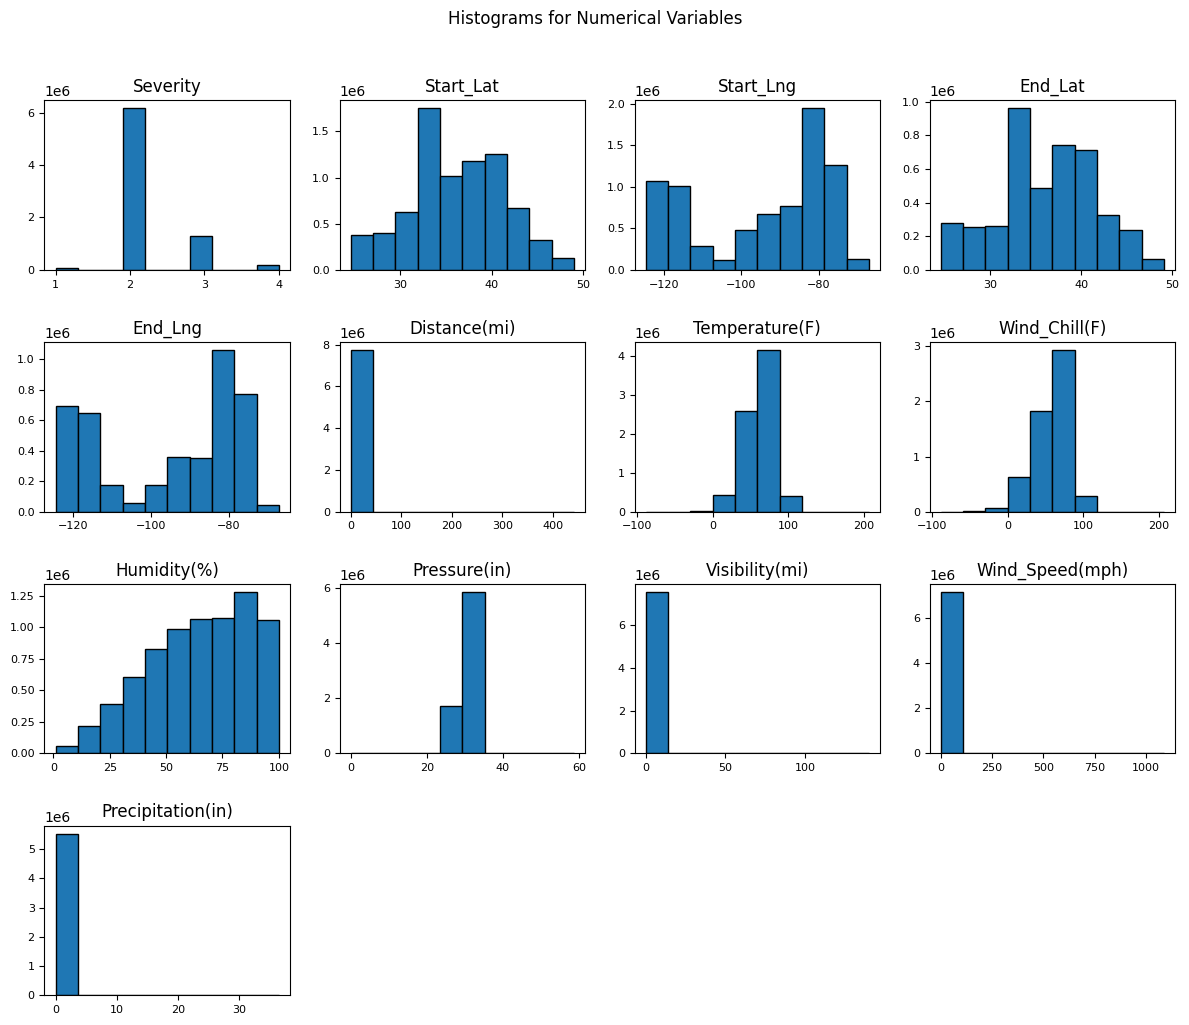

In [10]:
df_raw[numerical_cols_name].hist(bins=10, figsize=(12, 10), grid=False, xlabelsize=8, ylabelsize=8,  edgecolor='black')
plt.suptitle('Histograms for Numerical Variables', y=1.02, fontsize=12)
plt.tight_layout()
plt.savefig(FIGURES_DIR / "histograms" / "raw_features_histograms.png", dpi=300)
plt.show()
plt.close()

In [15]:
correlation_matrix = df_raw[numerical_cols_name].corr()

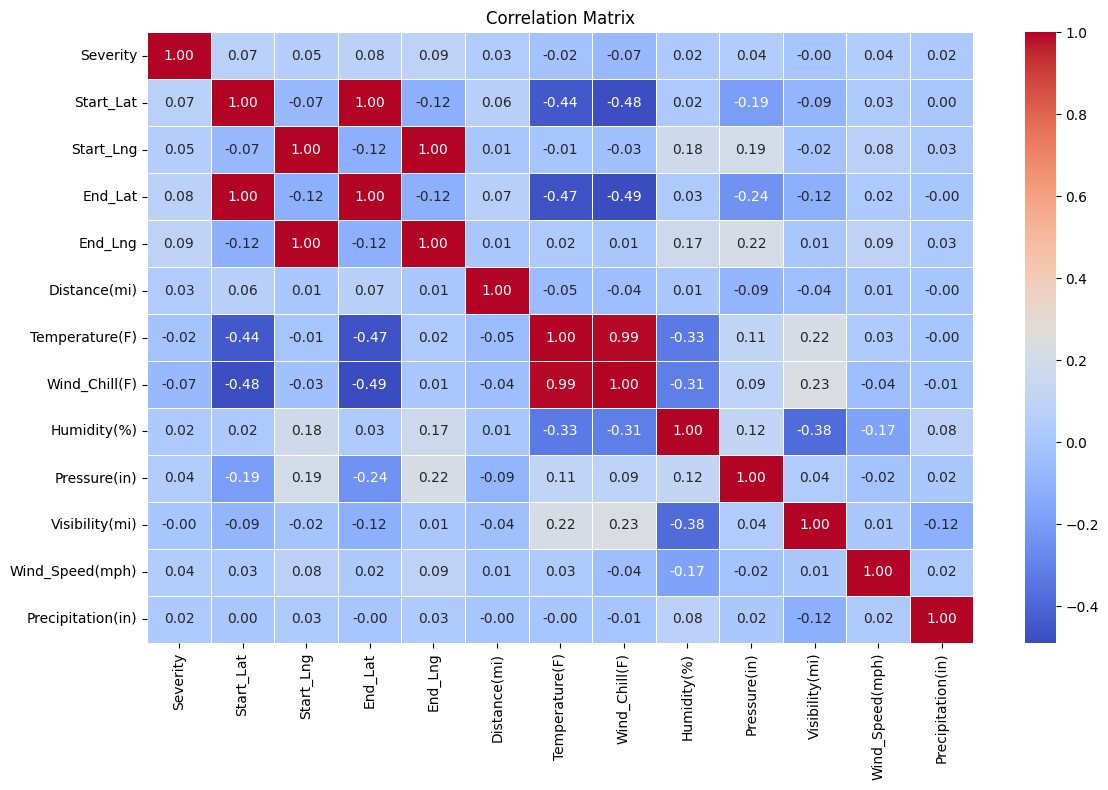

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig(FIGURES_DIR / "raw_correlation_matrix.png", bbox_inches='tight', dpi=300)
plt.show()
plt.close()

- Strong positive correlation between: ``Start_Lat`` and ``End_Lat``, ``Start_Lng`` and ``End_Lng``, ``Temperature(F)`` and ``Wind_Chill(F)``.  
- We will remove the columns ``End_Lat``, ``End_Lng``, and ``Wind_Chill``

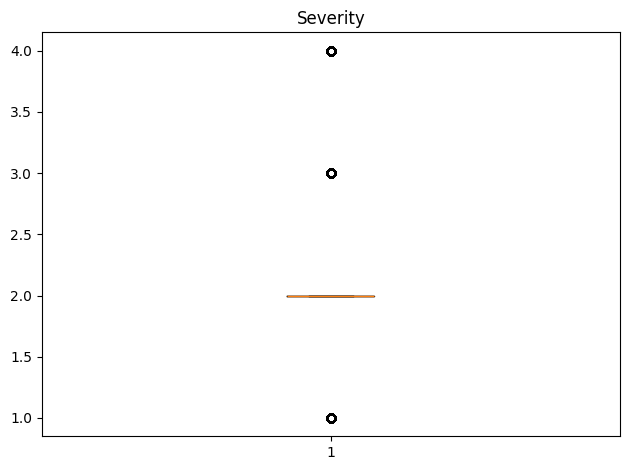

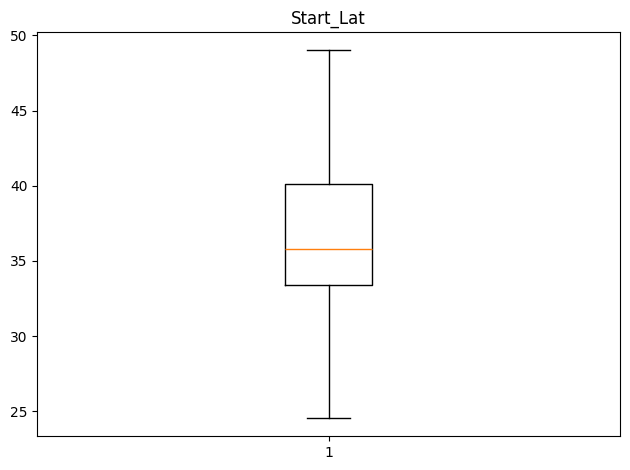

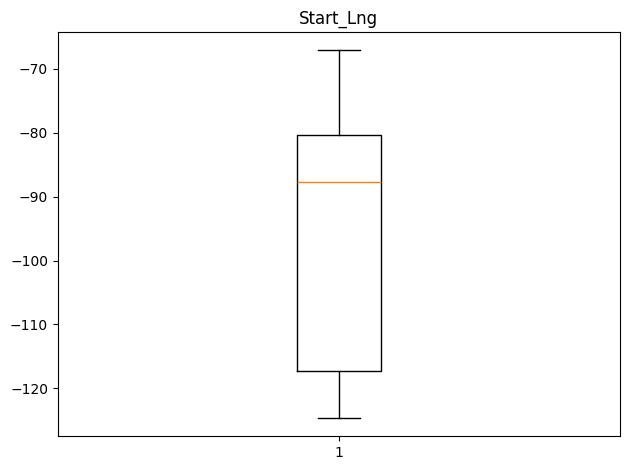

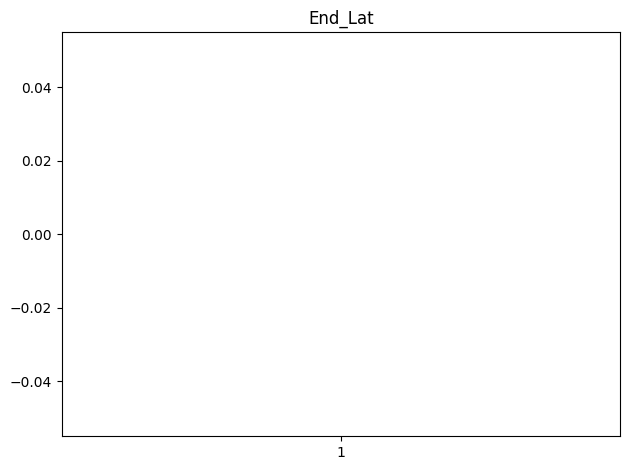

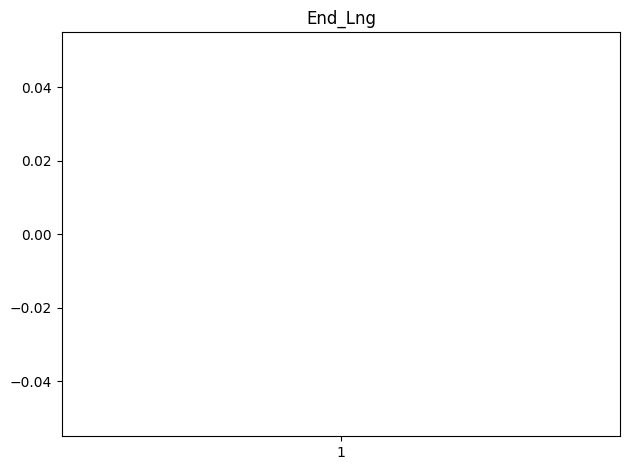

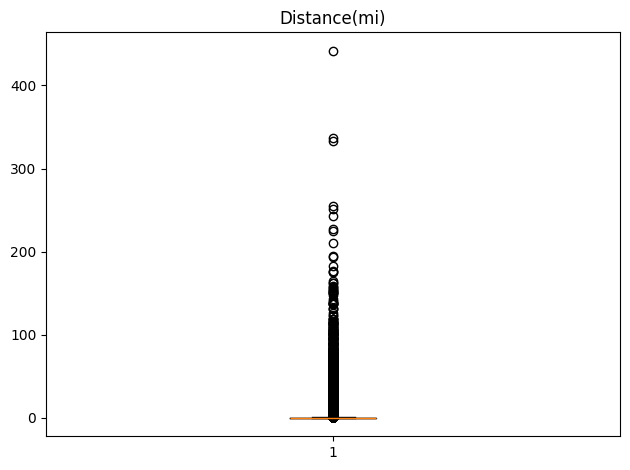

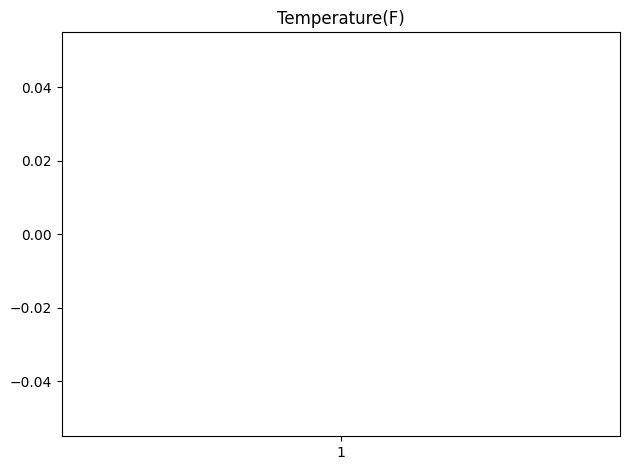

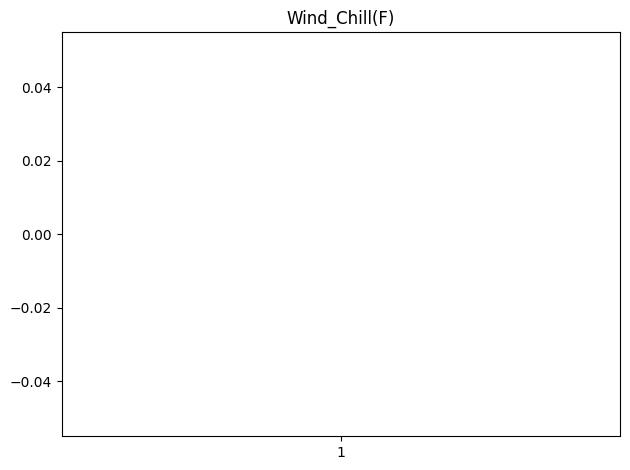

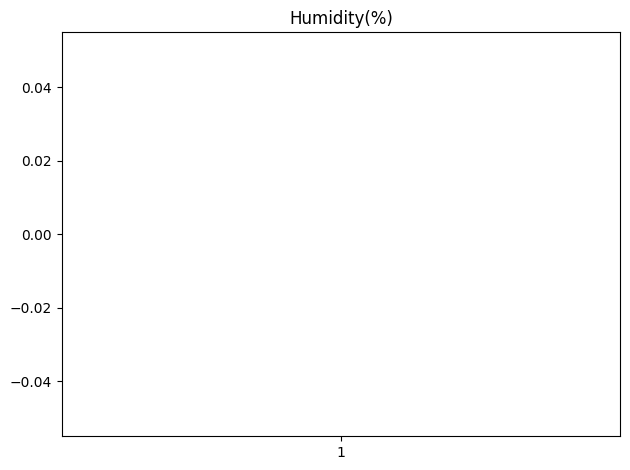

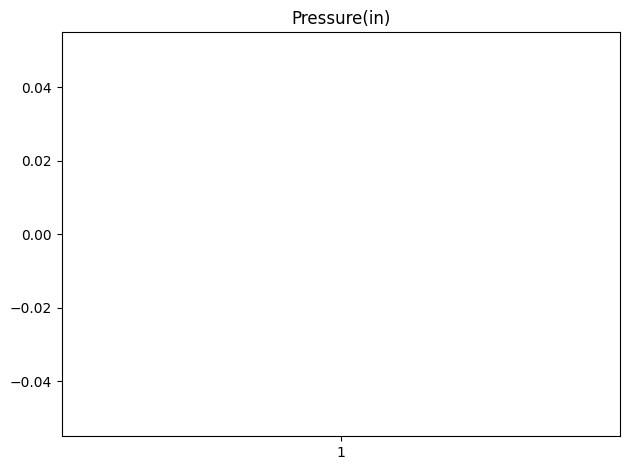

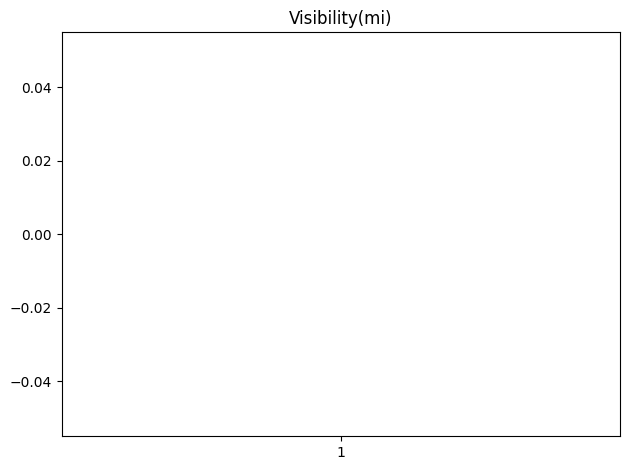

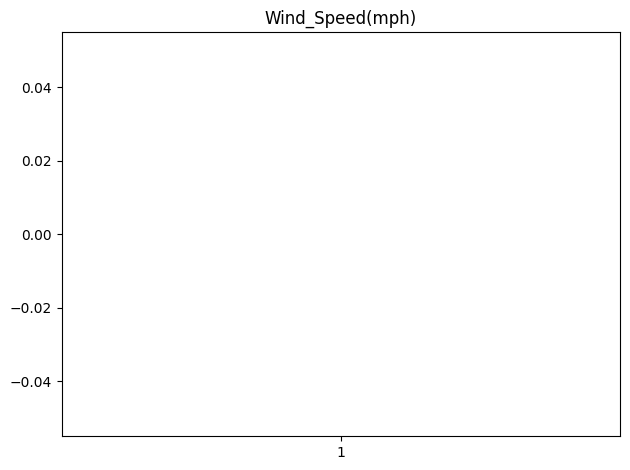

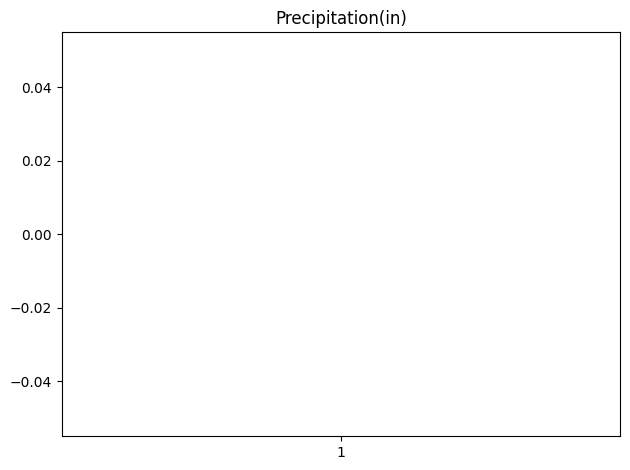

In [12]:
for col in numerical_cols_name:
    plot_box(df=df_raw, feature_name=col, path=FIGURES_DIR / "boxplots" / f"raw_{col}.png")

In [12]:
del df_raw

### 2.2 Plan

- normalize columns name

- drop unnecessary columns

- filling `Precipitation(in)`  and `Wind_Chill(F)` with the average of non-missing values from the same month.

- outliers removal

- create `Duration` column with `Start_Time` and `End_Time`, and getting start day, month, year

- vectorize accident description columns

- create pipeline for training

## Preprocessing

We preprocessed the dataset as described above on an AWS EMR cluster using PySpark for steps 1 to 5 (Code [here](../traffic_accident_impact/processing_spark.py) ).   
For step 6, since using OpenAI's `text-embedding-ada-002` model was not feasible due to the data size, we opted for a traditional vectorization approach using `Doc2Vec` (Code [here](../traffic_accident_impact/text_preprocessing.py))